In [7]:
#Import modules
import matplotlib.pyplot as plt
import numpy as np
import astropy
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Box2DKernel

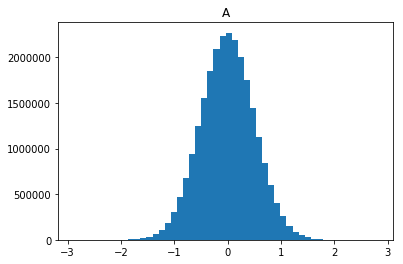

<Figure size 432x288 with 0 Axes>

In [5]:
# Create and show histogram array a
a = np.random.normal(loc=0.0, scale=0.5, size = (5000,5000))
aphi = a.flatten()
plt.hist(aphi, bins=50)
plt.title('A')
plt.show()
plt.clf()


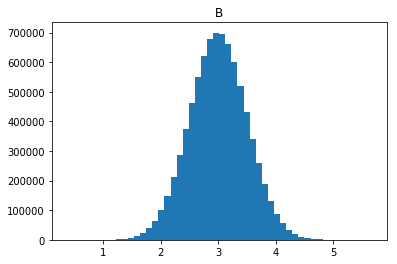

<Figure size 432x288 with 0 Axes>

In [6]:
# Create and show histogram of array b (shifted 3 over from a with a third of data points)
b = np.random.normal(loc=0.0, scale=0.5, size = (5000,5000))
b += 3 #shift
b = b[:1667, :5000] #third
bphi = b.flatten()
plt.hist(bphi, bins=50)
plt.title('B')
plt.show()
plt.clf()


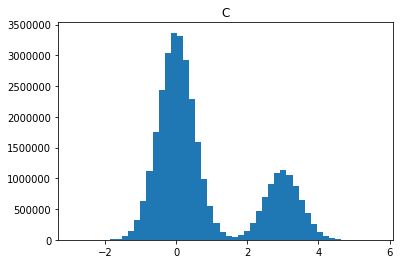

<Figure size 432x288 with 0 Axes>

In [8]:
# Create and show histogram of array c (a combination of a and b)
c = np.concatenate((a, b))
phi = c.flatten()
plt.hist(phi, bins=50)
plt.title('C')
plt.show()
plt.clf()

In [25]:
# Convolve
d = c
box_2D_kernel = Box2DKernel(1, mode = 'center')
nan=float('nan')
# d=np.where(c==0,nan,d)
d[ :, 0]=nan
d[0, :]=nan
d[ :,-1]=nan
d[-1, :]=nan
d2=ap_convolve(d, box_2D_kernel)

dd=d2
dd=dd[9:-9, 9:-9]
dd=np.ma.masked_invalid(dd)
ddmean=np.mean(dd)
ddstd=np.std(dd)
dd=dd-ddmean

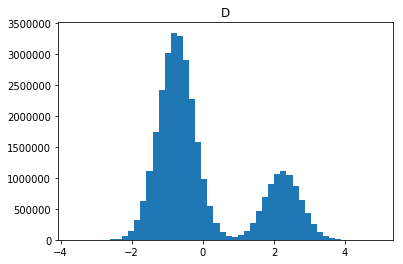

<Figure size 432x288 with 0 Axes>

In [26]:
# Create and show histogram of d
phi=dd.flatten()
# plt.plot(phi)
plt.hist(phi, bins = 50)
plt.title('D')
plt.show()
plt.clf()